21BAI1423
MORNING SLOT
WEEK-4

22-09-2023

1.Download the Employee Attrition Dataset
https://www.kaggle.com/datasets/patelprashant/employee-attrition

2.Perform Data Preprocessing

3.Model Building using Logistic Regression and Decision Tree and Random Forest

4.Calculate Performance metrics

# Data Preprocessing

    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o-	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the DataSet

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [79]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1.0,17.0,3.0,3,5.0,2.0,0.0,3.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1.0,9.0,3.0,3,7.0,7.0,1.0,7.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1.0,6.0,0.0,3,6.0,2.0,0.0,3.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0.0,17.0,3.0,2,9.0,6.0,0.0,8.0
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,...,3,1,0.0,6.0,3.0,4,4.0,3.0,1.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [80]:
df.size

45570

In [5]:
df.shape

(1470, 35)

## Checking for null values

In [6]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
print("Null percentage in columns : ")
for i in df.columns:
    c=df[i].count()
    n=df[i].isnull().sum()
    print(i," : ",(n/(n+c)) * 100)

Null percentage in columns : 
Age  :  0.0
Attrition  :  0.0
BusinessTravel  :  0.0
DailyRate  :  0.0
Department  :  0.0
DistanceFromHome  :  0.0
Education  :  0.0
EducationField  :  0.0
EmployeeCount  :  0.0
EmployeeNumber  :  0.0
EnvironmentSatisfaction  :  0.0
Gender  :  0.0
HourlyRate  :  0.0
JobInvolvement  :  0.0
JobLevel  :  0.0
JobRole  :  0.0
JobSatisfaction  :  0.0
MaritalStatus  :  0.0
MonthlyIncome  :  0.0
MonthlyRate  :  0.0
NumCompaniesWorked  :  0.0
Over18  :  0.0
OverTime  :  0.0
PercentSalaryHike  :  0.0
PerformanceRating  :  0.0
RelationshipSatisfaction  :  0.0
StandardHours  :  0.0
StockOptionLevel  :  0.0
TotalWorkingYears  :  0.0
TrainingTimesLastYear  :  0.0
WorkLifeBalance  :  0.0
YearsAtCompany  :  0.0
YearsInCurrentRole  :  0.0
YearsSinceLastPromotion  :  0.0
YearsWithCurrManager  :  0.0


## Data Visualization

<Axes: xlabel='Attrition', ylabel='count'>

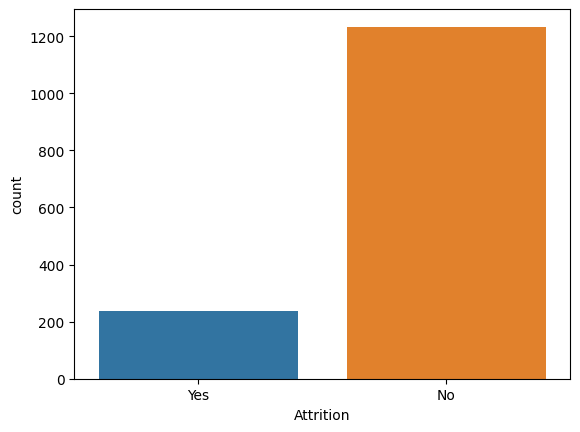

In [9]:
sns.countplot(x=df.Attrition,data=df)

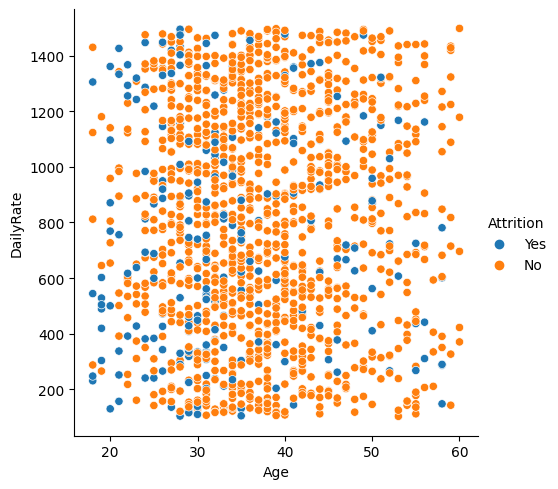

In [10]:
sns.relplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

<ipython-input-11-2c2d81c89147>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalWorkingYears"])


<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

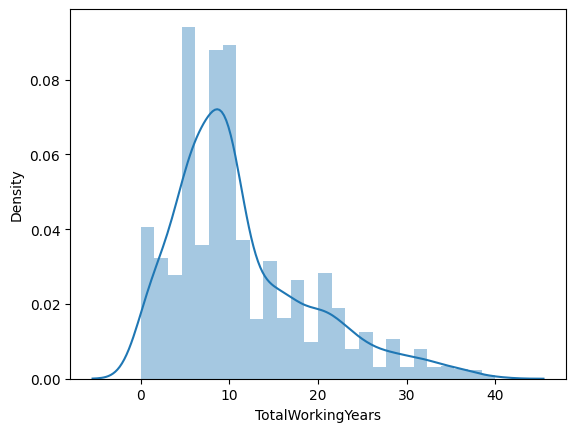

In [11]:
sns.distplot(df["TotalWorkingYears"])

In [12]:
# fig=plt.figure(figsize=(20,6))
# sns.pairplot(df)

In [13]:
corr=df.corr(numeric_only=True)
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<Axes: >

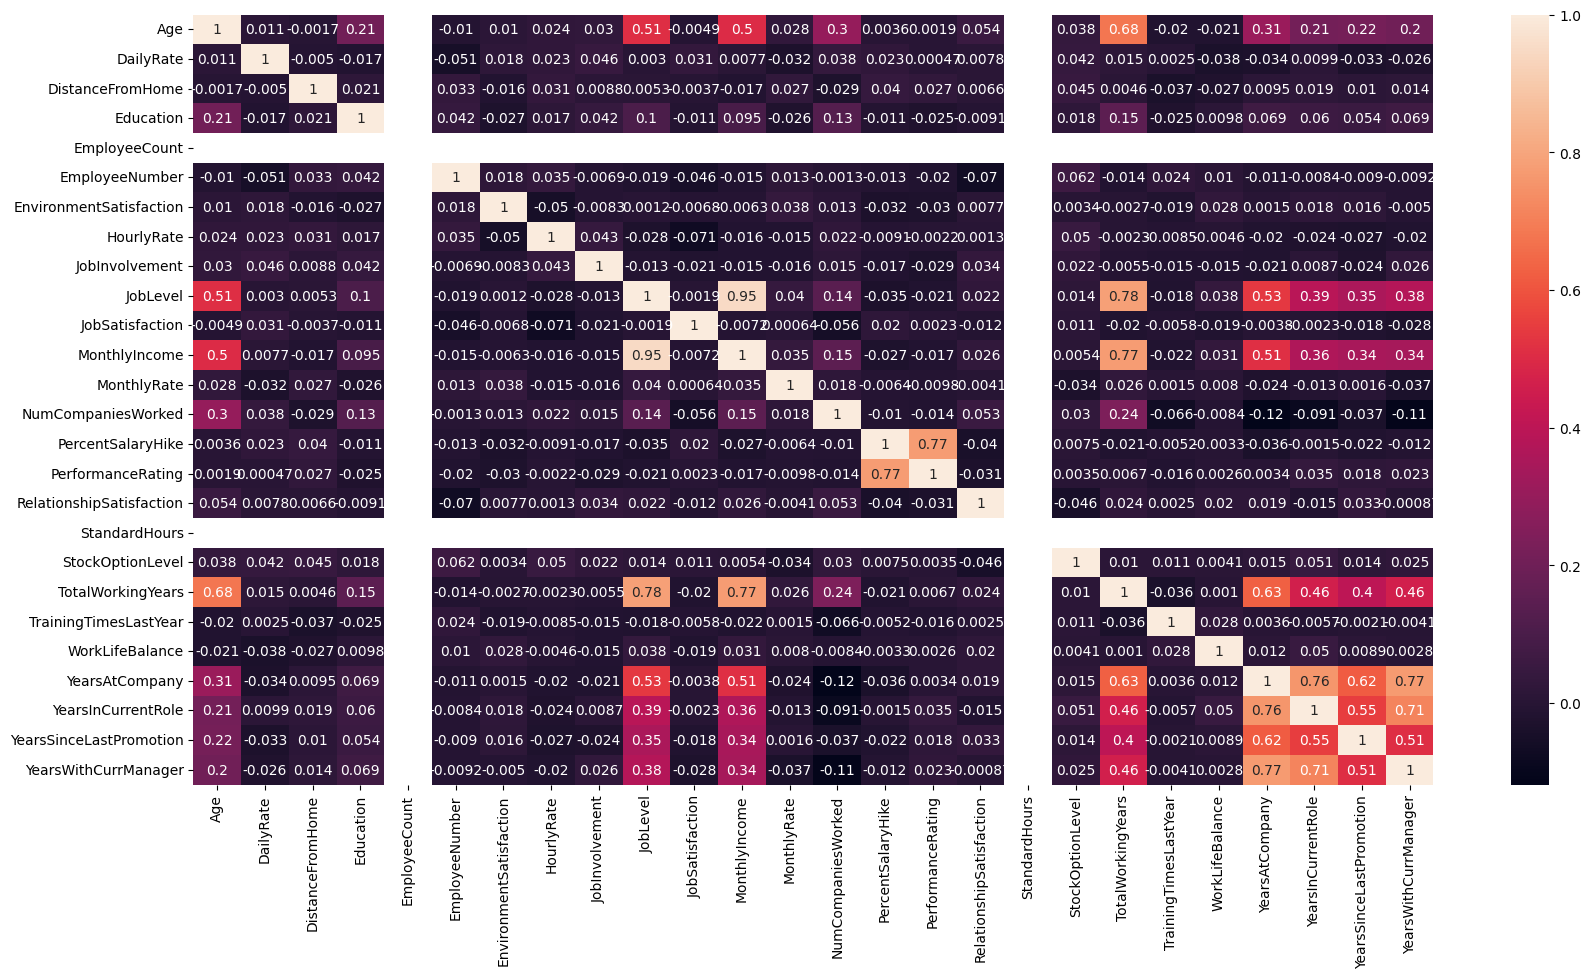

In [14]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,)

## Outlier Detection

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: >

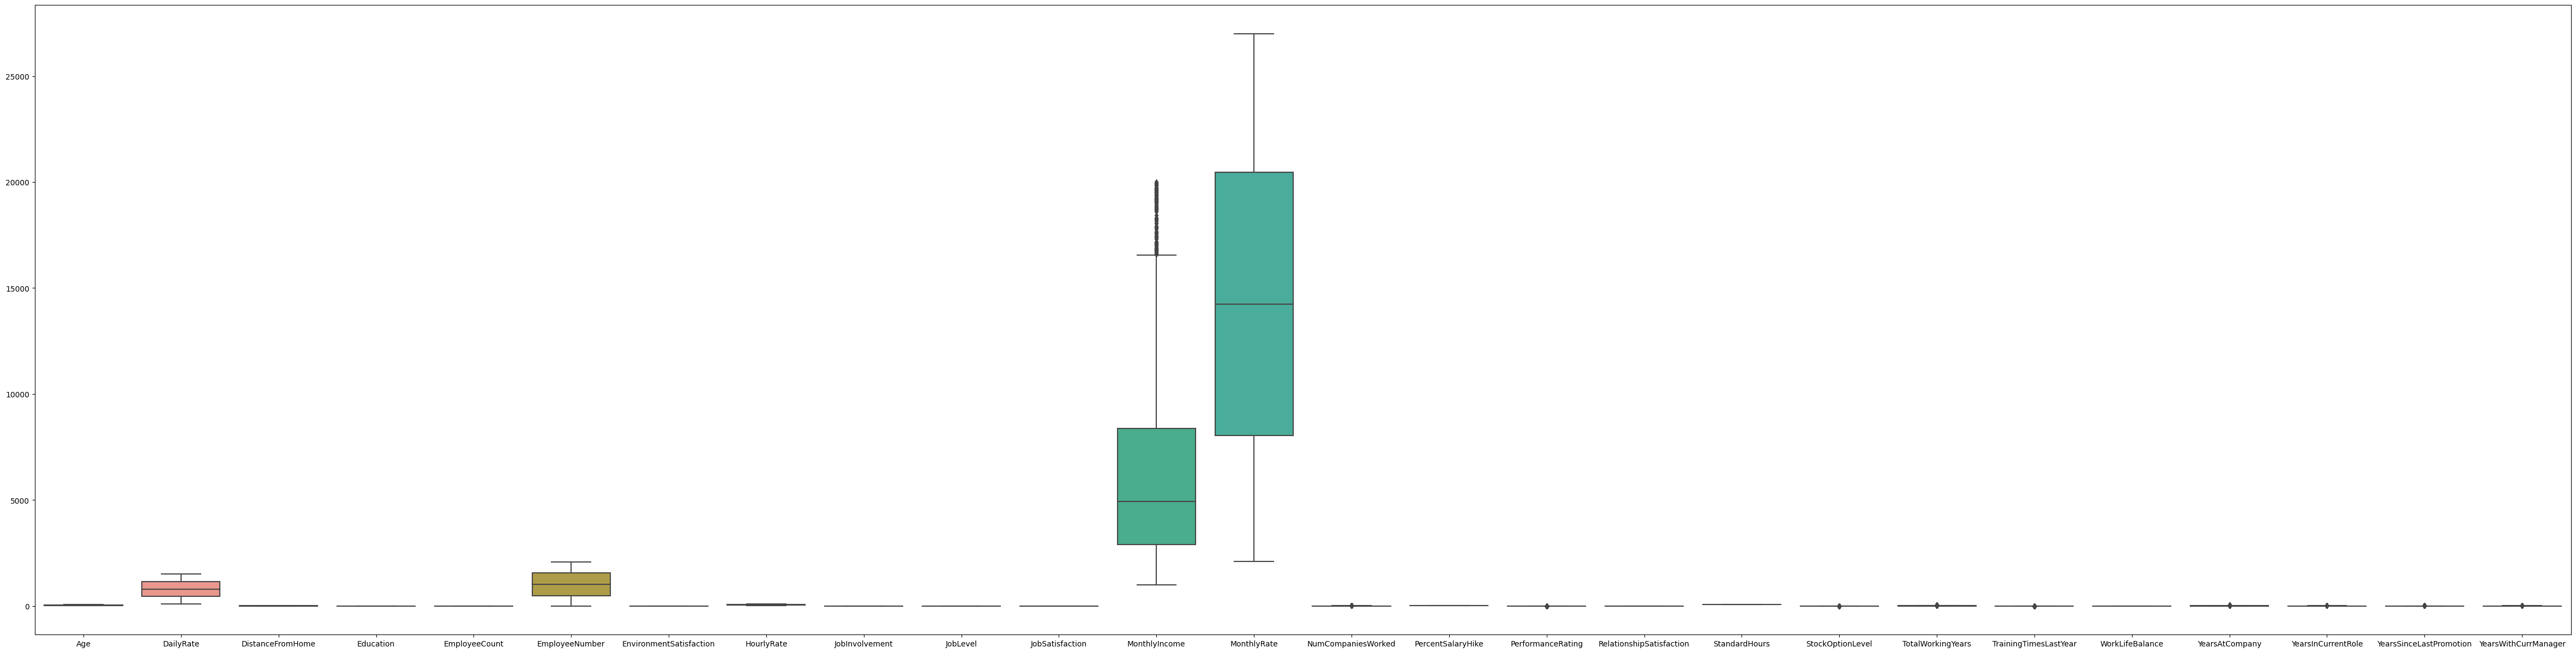

In [16]:
fig=plt.figure(figsize=(60,15))
sns.boxplot(df)

<ipython-input-17-d0c2f0b5eb22>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


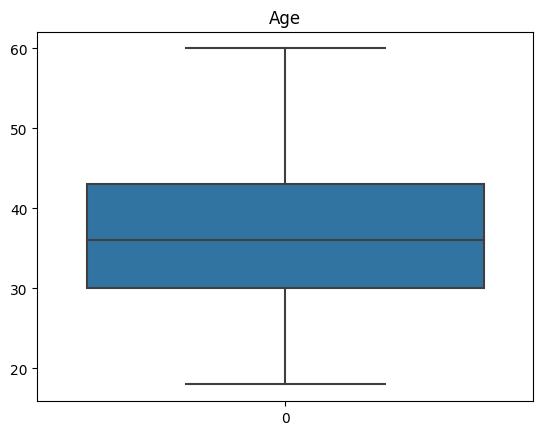

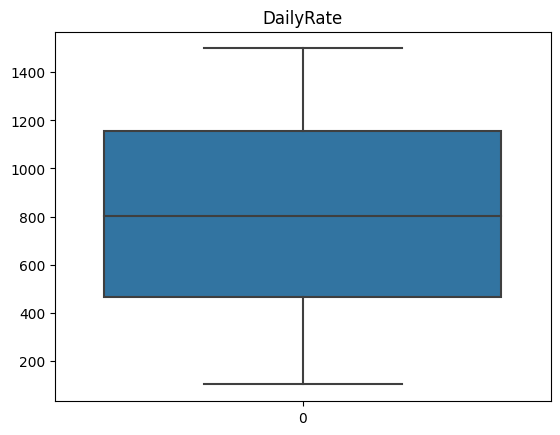

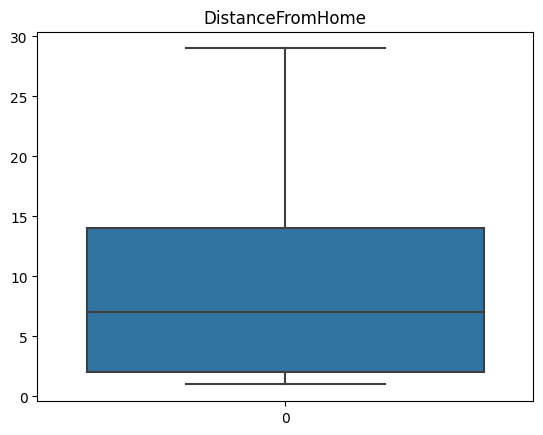

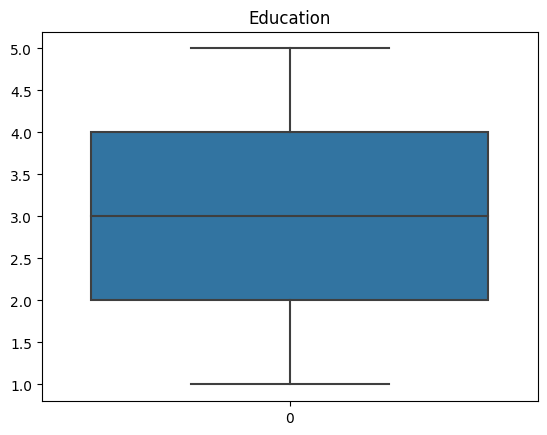

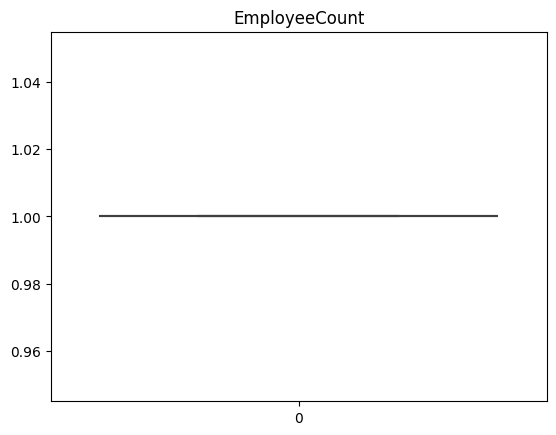

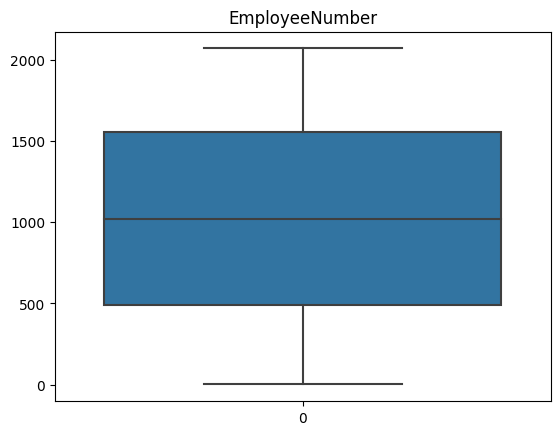

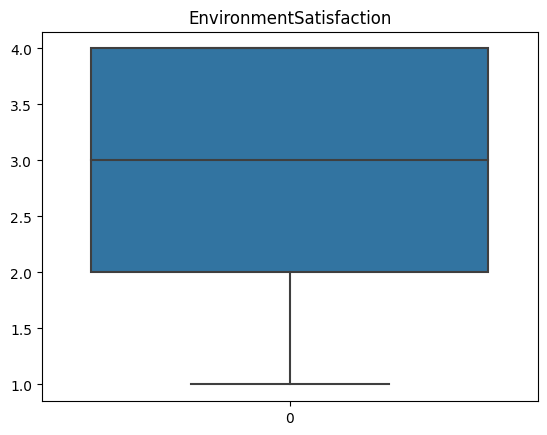

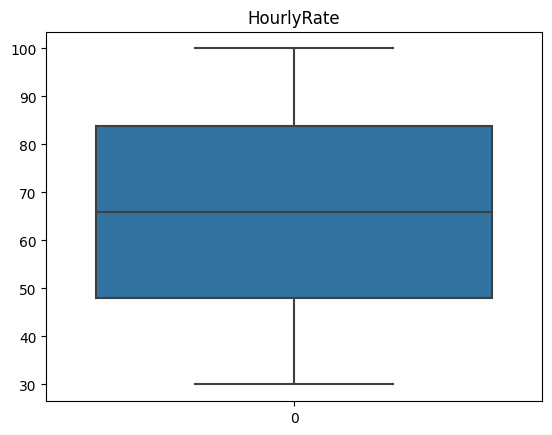

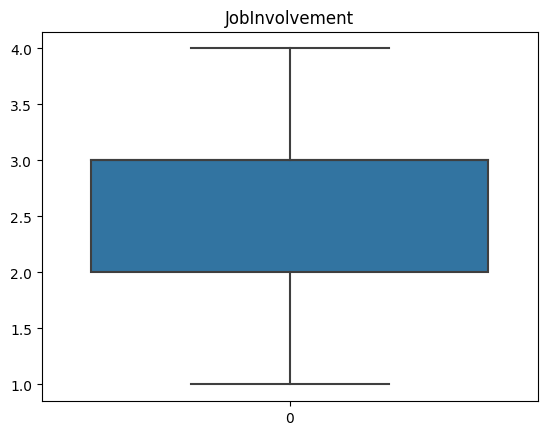

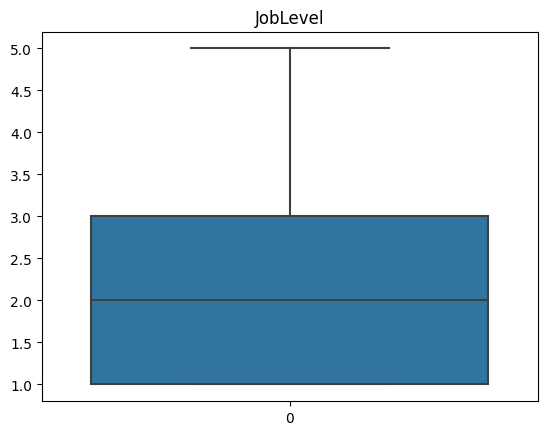

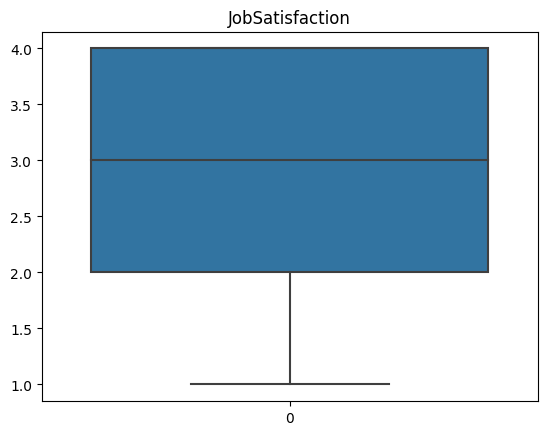

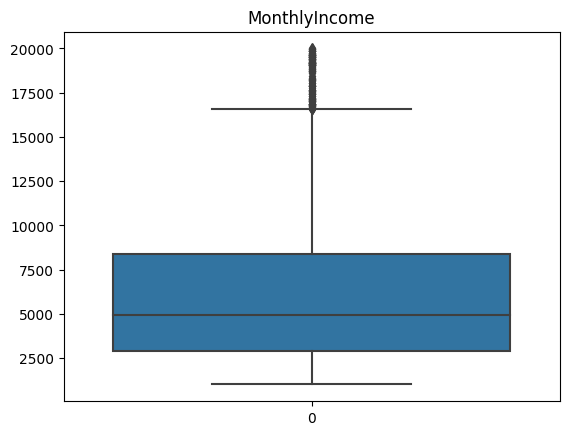

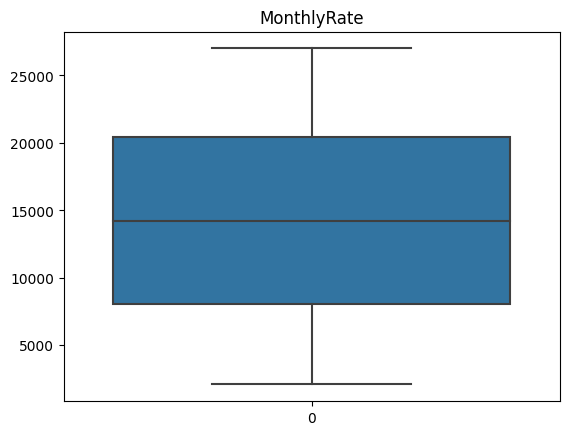

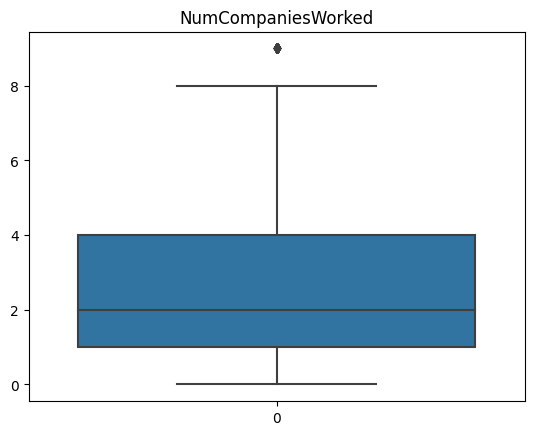

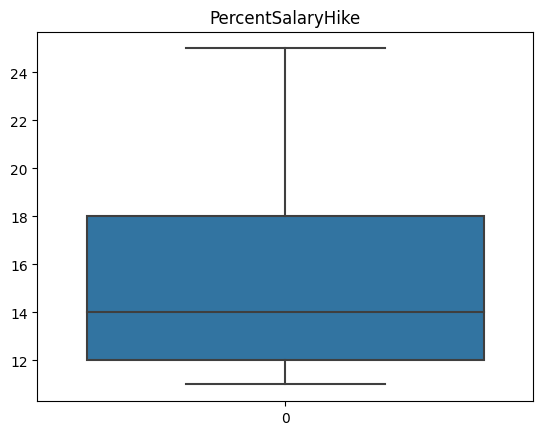

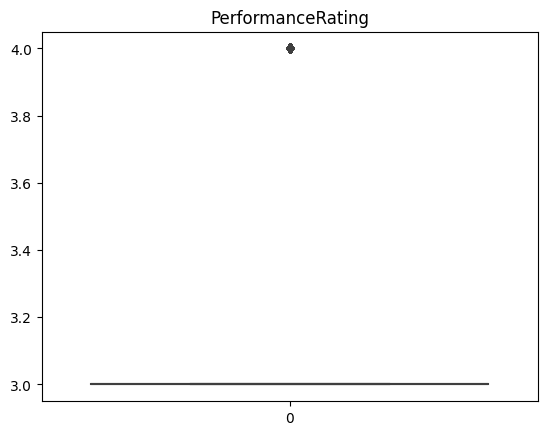

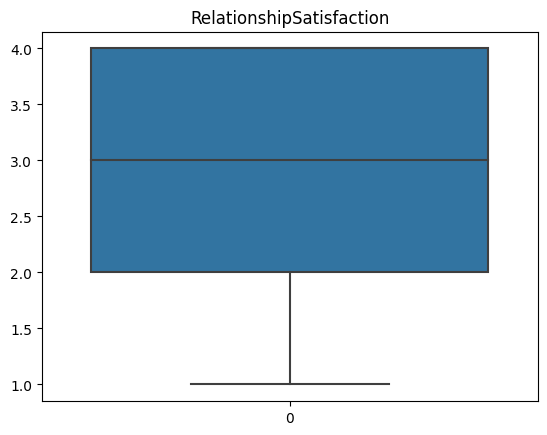

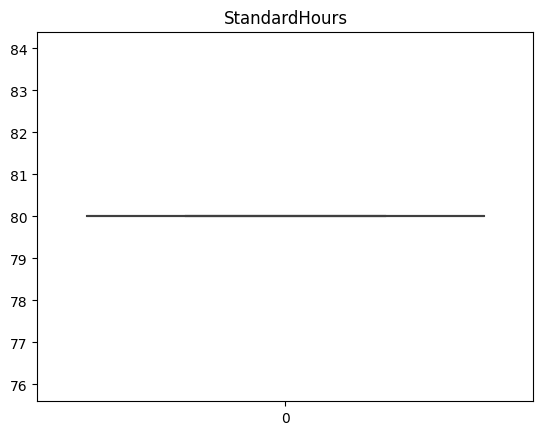

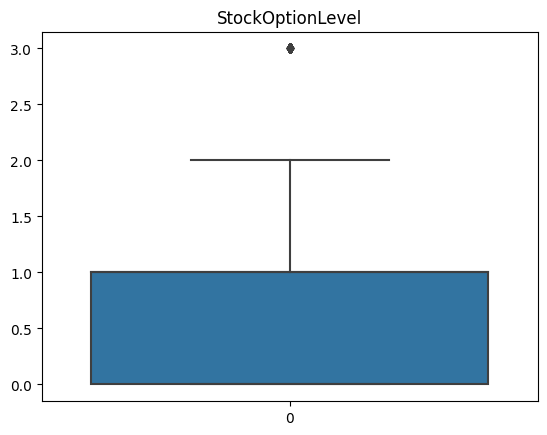

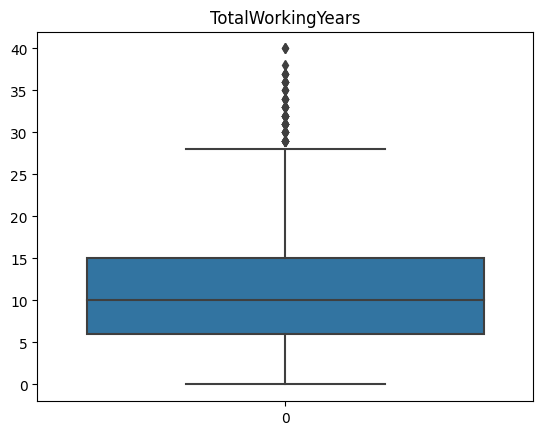

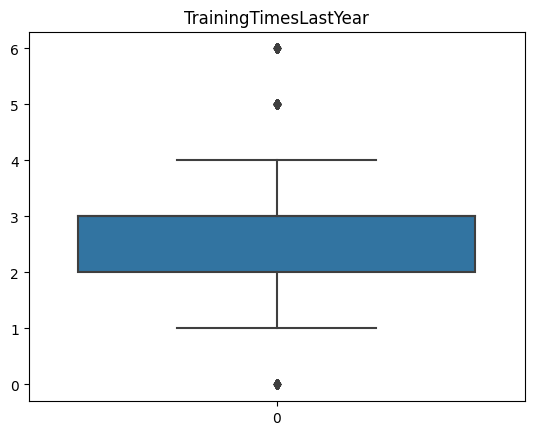

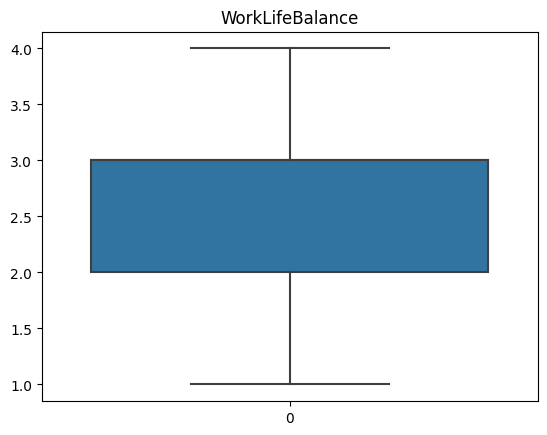

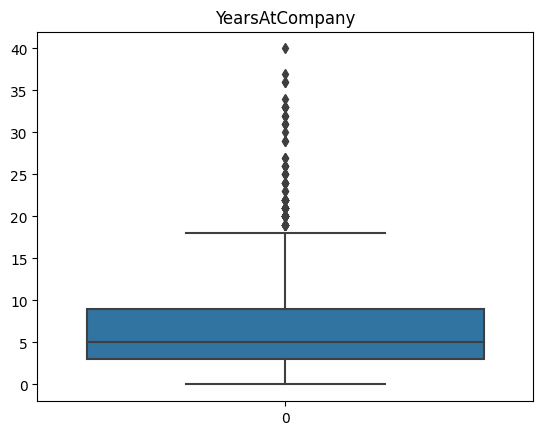

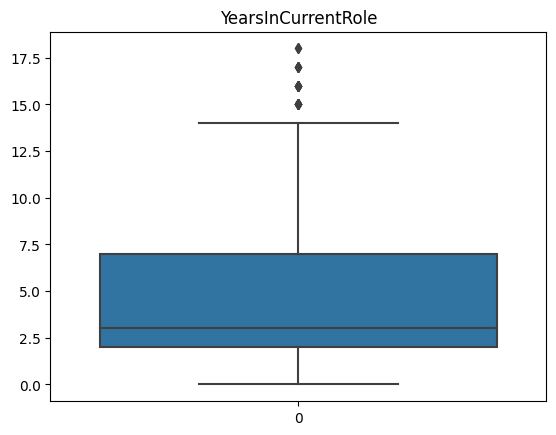

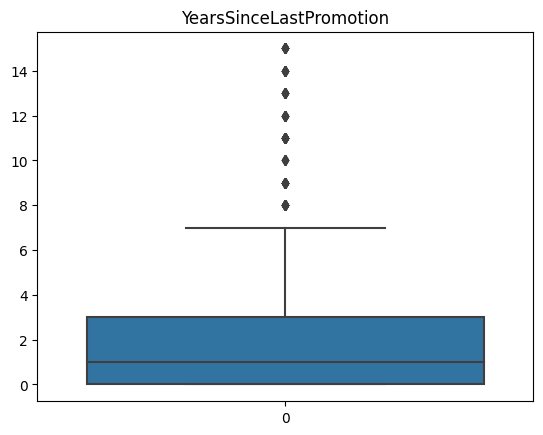

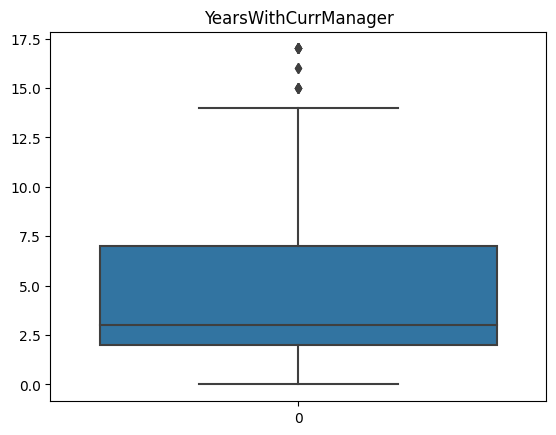

In [17]:
for i in df.columns:
    if(df[i].dtype!=object):
        plt.figure()
        plt.title(i)
        sns.boxplot(df[i])

In [18]:
l=["MonthlyIncome","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
       "YearsWithCurrManager"]
for i in l:
    q3=df[i].quantile(0.75)
    q1=df[i].quantile(0.25)
    IQR=q3-q1
    upper_limit=q3+(1.5*IQR)
    lower_limit=q1-(1.5*IQR)
    df[i]=np.where(df[i]>upper_limit,df[i].median(),df[i])

<ipython-input-19-d0c2f0b5eb22>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


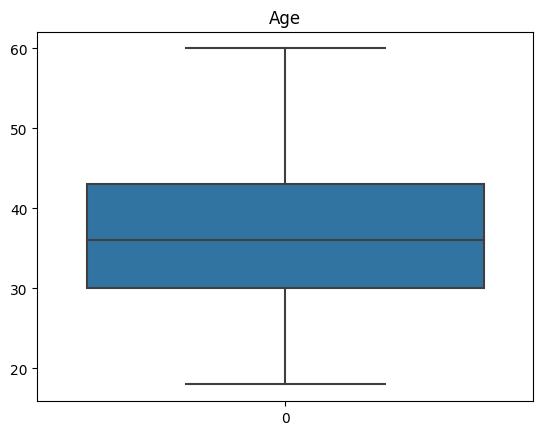

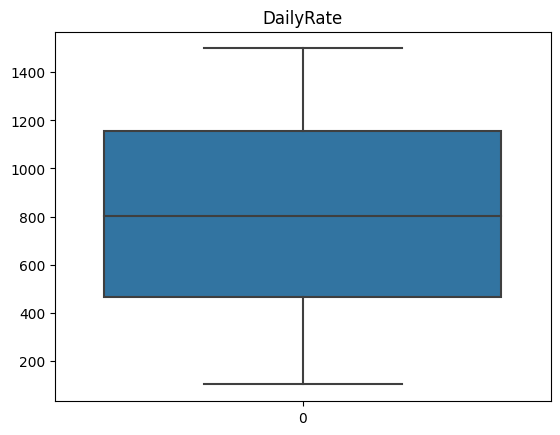

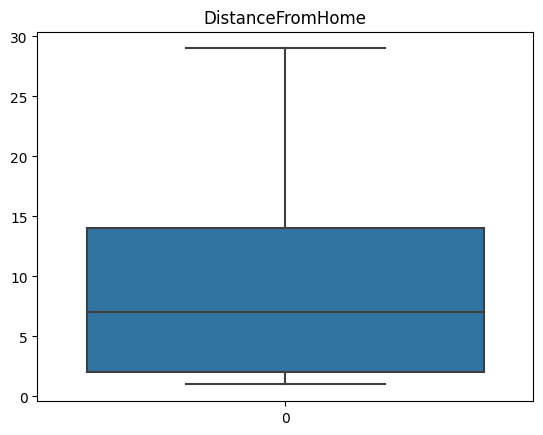

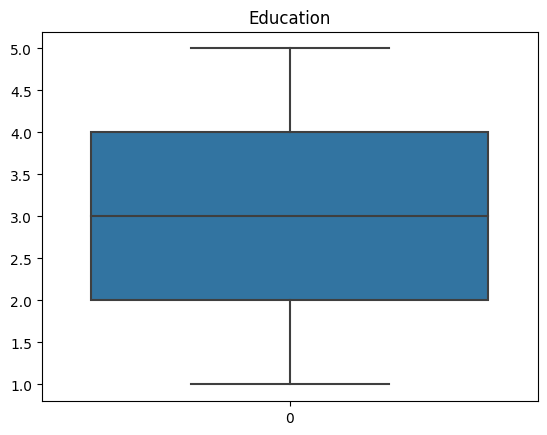

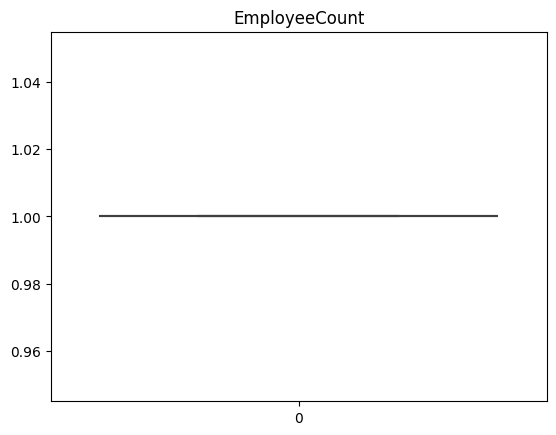

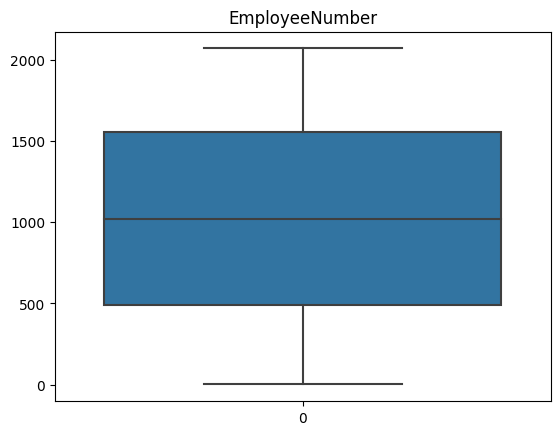

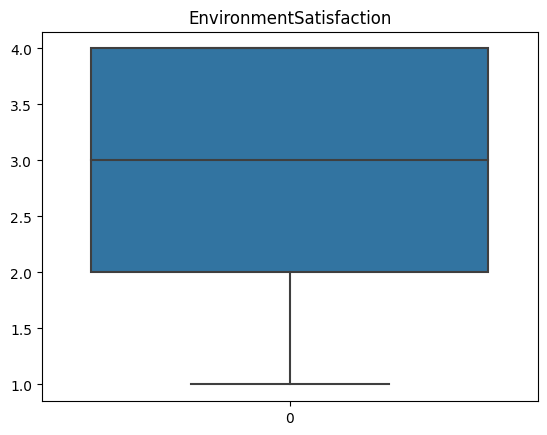

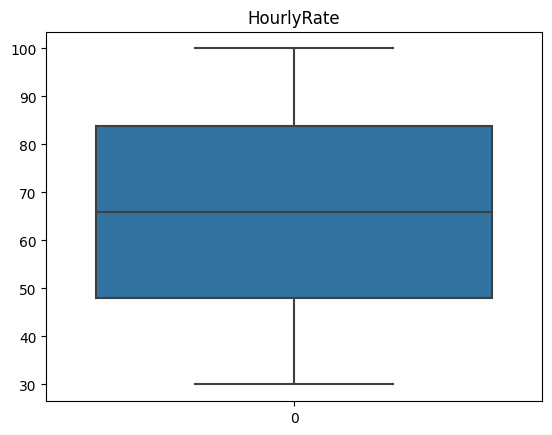

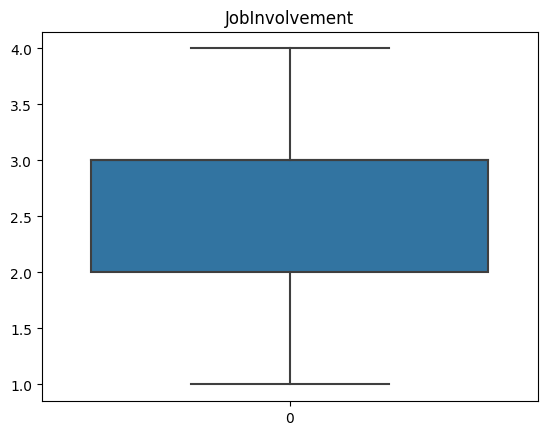

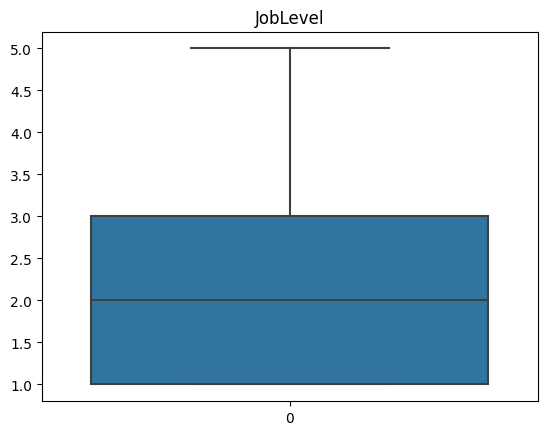

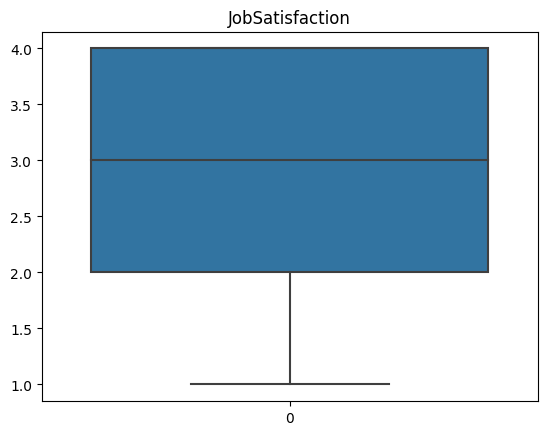

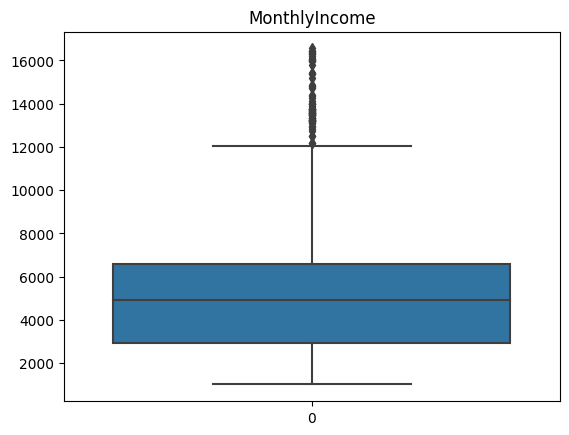

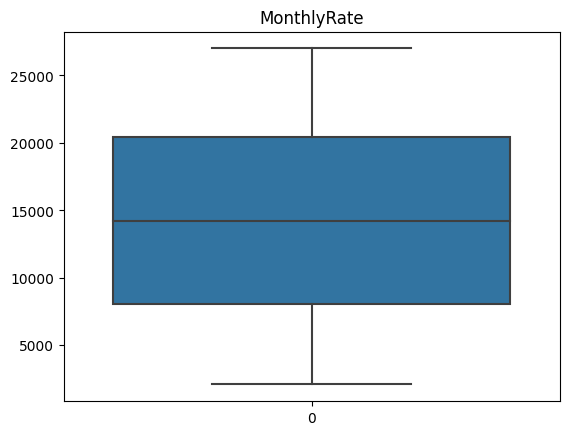

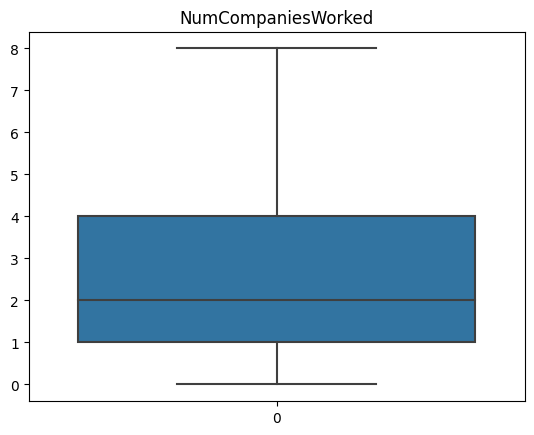

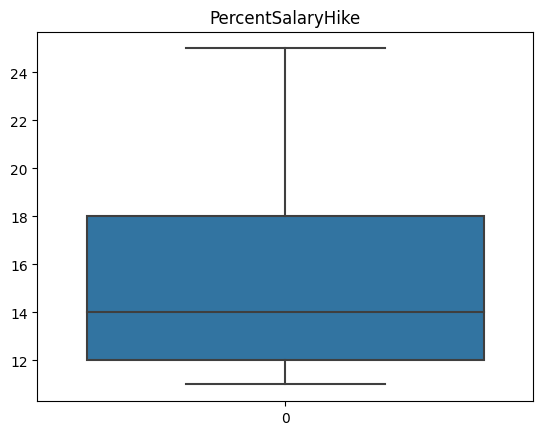

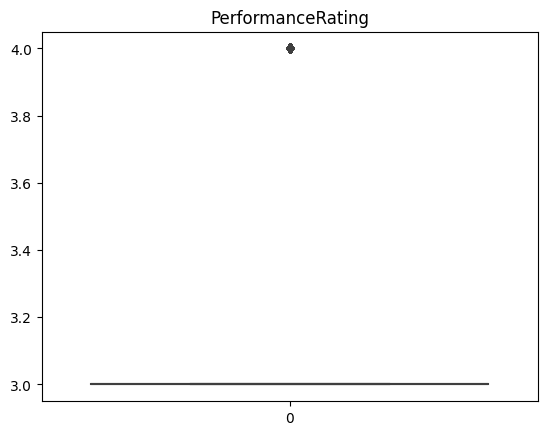

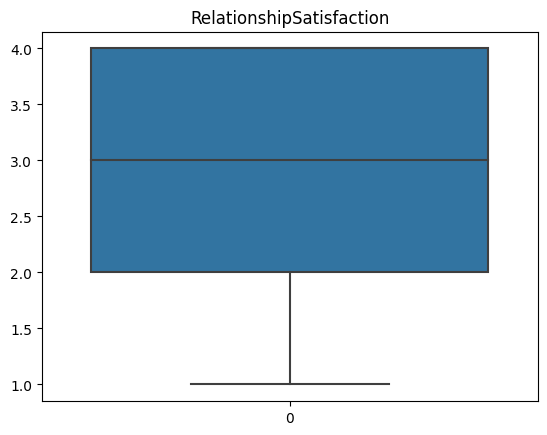

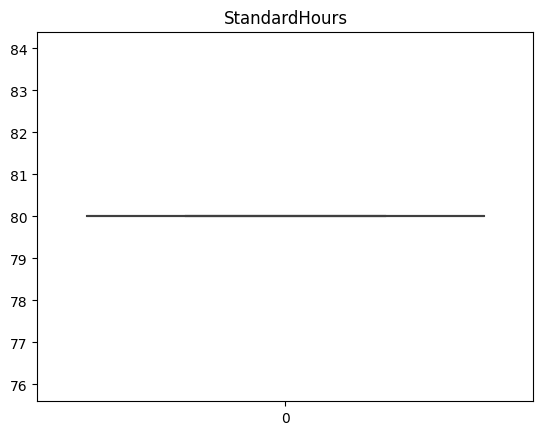

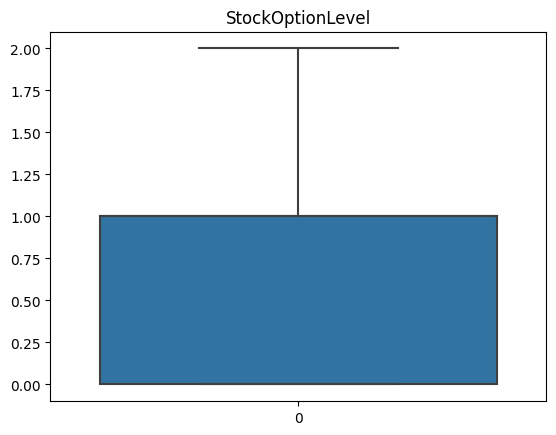

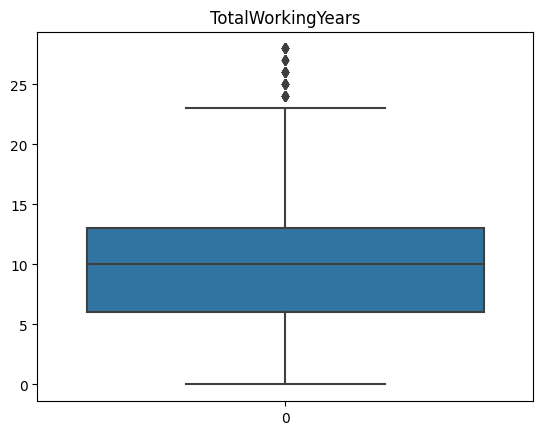

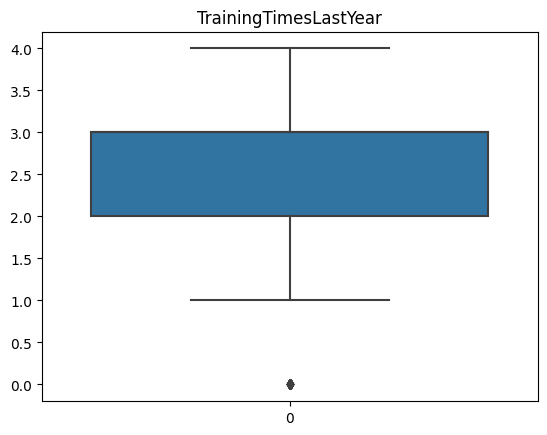

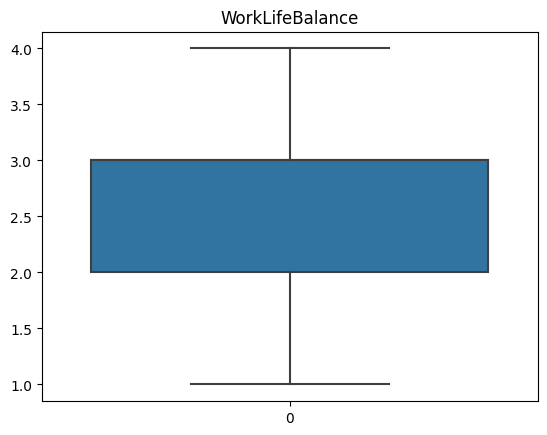

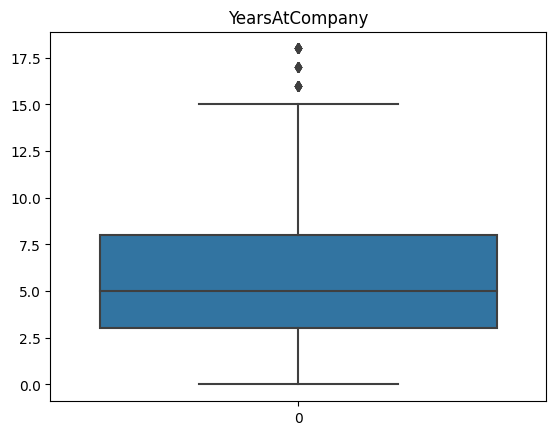

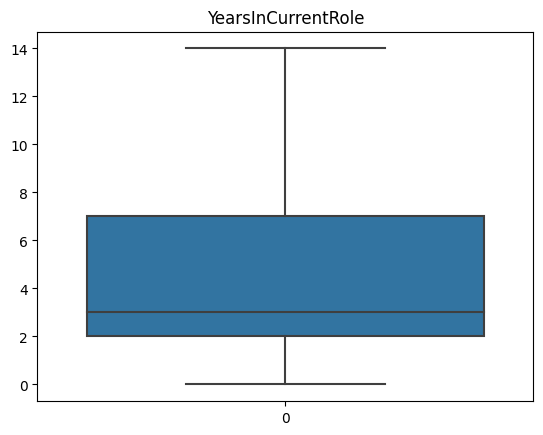

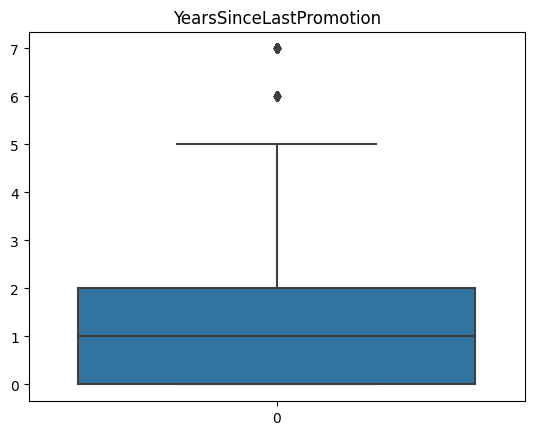

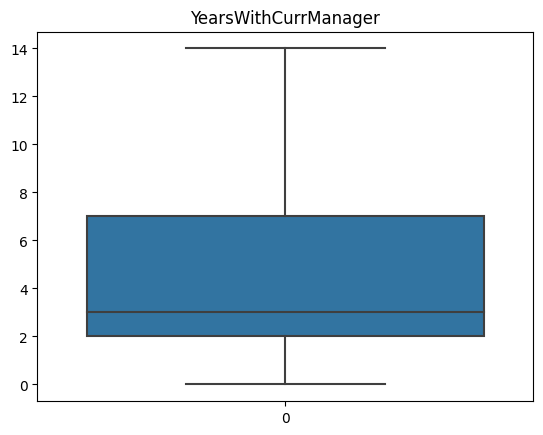

In [19]:
for i in df.columns:
    if(df[i].dtype!=object):
        plt.figure()
        plt.title(i)
        sns.boxplot(df[i])

## Splitting Dependent and Independent variables

In [20]:
df.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1,inplace=True)

In [21]:
df.shape

(1470, 31)

In [22]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0.0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


In [23]:
x=df.drop("Attrition",axis=1)
y=df.iloc[:,1:2]

In [24]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0.0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


In [25]:
y.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [26]:
y=np.squeeze(y)
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [27]:
type(x)

pandas.core.frame.DataFrame

In [28]:
type(y)

pandas.core.series.Series

## Perform Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded=pd.Series(le.fit_transform(y))

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

In [31]:
Business_Travel1=pd.get_dummies(df["BusinessTravel"],drop_first=True).astype(int)
Department1=pd.get_dummies(df["Department"],drop_first=True).astype(int)
EducationField1=pd.get_dummies(df["EducationField"],drop_first=True).astype(int)
Gender1=pd.get_dummies(df["Gender"],drop_first=True).astype(int)
JobRole1=pd.get_dummies(df["JobRole"],drop_first=True).astype(int)
MaritalStatus1=pd.get_dummies(df["MaritalStatus"],drop_first=True).astype(int)
OverTime1=pd.get_dummies(df["OverTime"],drop_first=True).astype(int)

In [32]:
x=pd.concat([x,Business_Travel1],axis=1)
x=pd.concat([x,Department1],axis=1)
x=pd.concat([x,EducationField1],axis=1)
x=pd.concat([x,Gender1],axis=1)
x=pd.concat([x,JobRole1],axis=1)
x=pd.concat([x,MaritalStatus1],axis=1)
x=pd.concat([x,OverTime1],axis=1)

In [33]:
x.drop(['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime'],axis = 1, inplace = True)

In [34]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,41,1102,1,2,2,94,3,2,4,5993.0,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130.0,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090.0,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909.0,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468.0,...,1,0,0,0,0,0,0,1,0,0


In [35]:
y_encoded.head()

0    1
1    0
2    1
3    0
4    0
dtype: int64

## Feature Scaling.

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [37]:
x_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,0.167809,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.102624,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-1.055253,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.798607,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.623436,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


## Splitting Data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encoded,test_size=0.2,random_state=0)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1176, 44) (294, 44) (1176,) (294,)


# Preprocessing Done

# -->Model Building - Logistic regression

## Import the model building Libraries

In [40]:
from sklearn.linear_model import LogisticRegression

## Initializing the model

In [41]:
lr=LogisticRegression()

## Training the Model

In [42]:
lr.fit(x_train,y_train)

LogisticRegression()

## Testing the Model

In [43]:
y_pred=lr.predict(x_test)

In [44]:
pd.DataFrame({"Actual_values":y_test,"Predicted_values":y_pred})

,Actual_values,Predicted_values
442,0,0
1091,0,0
981,1,1
785,0,0
1332,1,1
...,...,...
1439,0,0
481,0,0
124,1,1
198,0,0


## Evaluation of Model & Performance metrics

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [46]:
print("Accuracy of model :",accuracy_score(y_test,y_pred))

Accuracy of model : 0.8843537414965986


In [47]:
confusion_matrix(y_test,y_pred)

array([[240,   5],
       [ 29,  20]])

In [48]:
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,240,5
1,29,20


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.80      0.41      0.54        49

    accuracy                           0.88       294
   macro avg       0.85      0.69      0.74       294
weighted avg       0.88      0.88      0.87       294



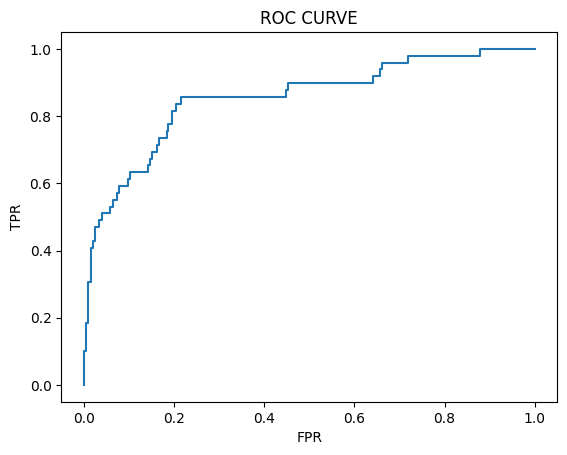

In [50]:
#ROC-AUC Curve
probability=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [51]:
threshsholds

array([1.92926459e+00, 9.29264586e-01, 8.24540258e-01, 8.19719126e-01,
       7.05864328e-01, 7.01705053e-01, 6.17766349e-01, 5.95134749e-01,
       5.60745910e-01, 5.26613211e-01, 4.82199936e-01, 4.81745804e-01,
       4.74771100e-01, 4.36986830e-01, 4.33933781e-01, 4.22776305e-01,
       4.07031472e-01, 3.81195557e-01, 3.72640404e-01, 3.56480271e-01,
       3.53555059e-01, 3.41067921e-01, 3.40185812e-01, 3.30713733e-01,
       3.28068832e-01, 3.11941526e-01, 3.11145218e-01, 3.04942832e-01,
       3.03211961e-01, 2.76465104e-01, 2.76106724e-01, 2.68938573e-01,
       2.62950012e-01, 2.57892042e-01, 2.57227758e-01, 2.31938463e-01,
       2.30362095e-01, 2.25980078e-01, 2.25440213e-01, 2.05879790e-01,
       2.02882152e-01, 2.02880868e-01, 2.01832278e-01, 2.01165755e-01,
       1.94087843e-01, 1.88025837e-01, 1.87851863e-01, 1.85196453e-01,
       1.75513007e-01, 6.79076553e-02, 6.69401546e-02, 6.42453954e-02,
       6.41505789e-02, 3.50408809e-02, 3.47843524e-02, 3.31473257e-02,
      

# --> Model Building - Decision Tree

## Import the Model Builiding Libraries

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Initializing the Model

In [53]:
dtc=DecisionTreeClassifier()

## Hyper parametering and Training of Model

In [54]:
parameters=[{
    'criterion':['gini','Entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2'],
    'random_state':[0,42],
}]

griddtc=GridSearchCV(dtc,param_grid=parameters,cv=5,scoring='accuracy')

## Training the Model

In [55]:
griddtc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'Entropy'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'random_state': [0, 42],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [56]:
griddtc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'random_state': 42,
 'splitter': 'random'}

## Testing the Model

In [57]:
 y_pred1=griddtc.predict(x_test)

In [58]:
pd.DataFrame({"Actual_values":y_test,"Predicted_values":y_pred1})

,Actual_values,Predicted_values
442,0,0
1091,0,0
981,1,0
785,0,0
1332,1,1
...,...,...
1439,0,0
481,0,0
124,1,0
198,0,0


## Evaluation of Model & Performance metrics

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


In [60]:
print("Accuracy of model :",accuracy_score(y_test,y_pred1))

Accuracy of model : 0.8367346938775511


In [61]:
confusion_matrix(y_test,y_pred1)

array([[240,   5],
       [ 43,   6]])

In [62]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.55      0.12      0.20        49

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.55       294
weighted avg       0.80      0.84      0.79       294



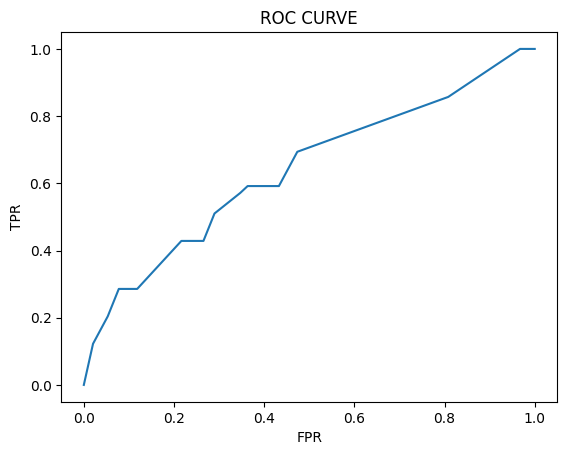

In [63]:
#ROC-AUC Curve
probability=griddtc.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [64]:
threshsholds

array([1.67647059, 0.67647059, 0.39583333, 0.37037037, 0.33823529,
       0.23577236, 0.2       , 0.18867925, 0.18604651, 0.16666667,
       0.15517241, 0.08474576, 0.07715134, 0.05936073, 0.        ])

[Text(0.3232489224137931, 0.96875, 'x[16] <= -1.397\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.09137931034482759, 0.90625, 'x[42] <= 0.387\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.05172413793103448, 0.84375, 'x[2] <= 0.902\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.034482758620689655, 0.78125, 'x[23] <= 0.797\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.020689655172413793, 0.71875, 'x[8] <= -1.114\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.013793103448275862, 0.65625, 'x[43] <= 0.482\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.006896551724137931, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.020689655172413793, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.027586206896551724, 0.65625, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.04827586206896552, 0.71875, 'x[9] <= -1.125\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.041379310344827586, 0.65625, 'gini = 0.0\nsamp

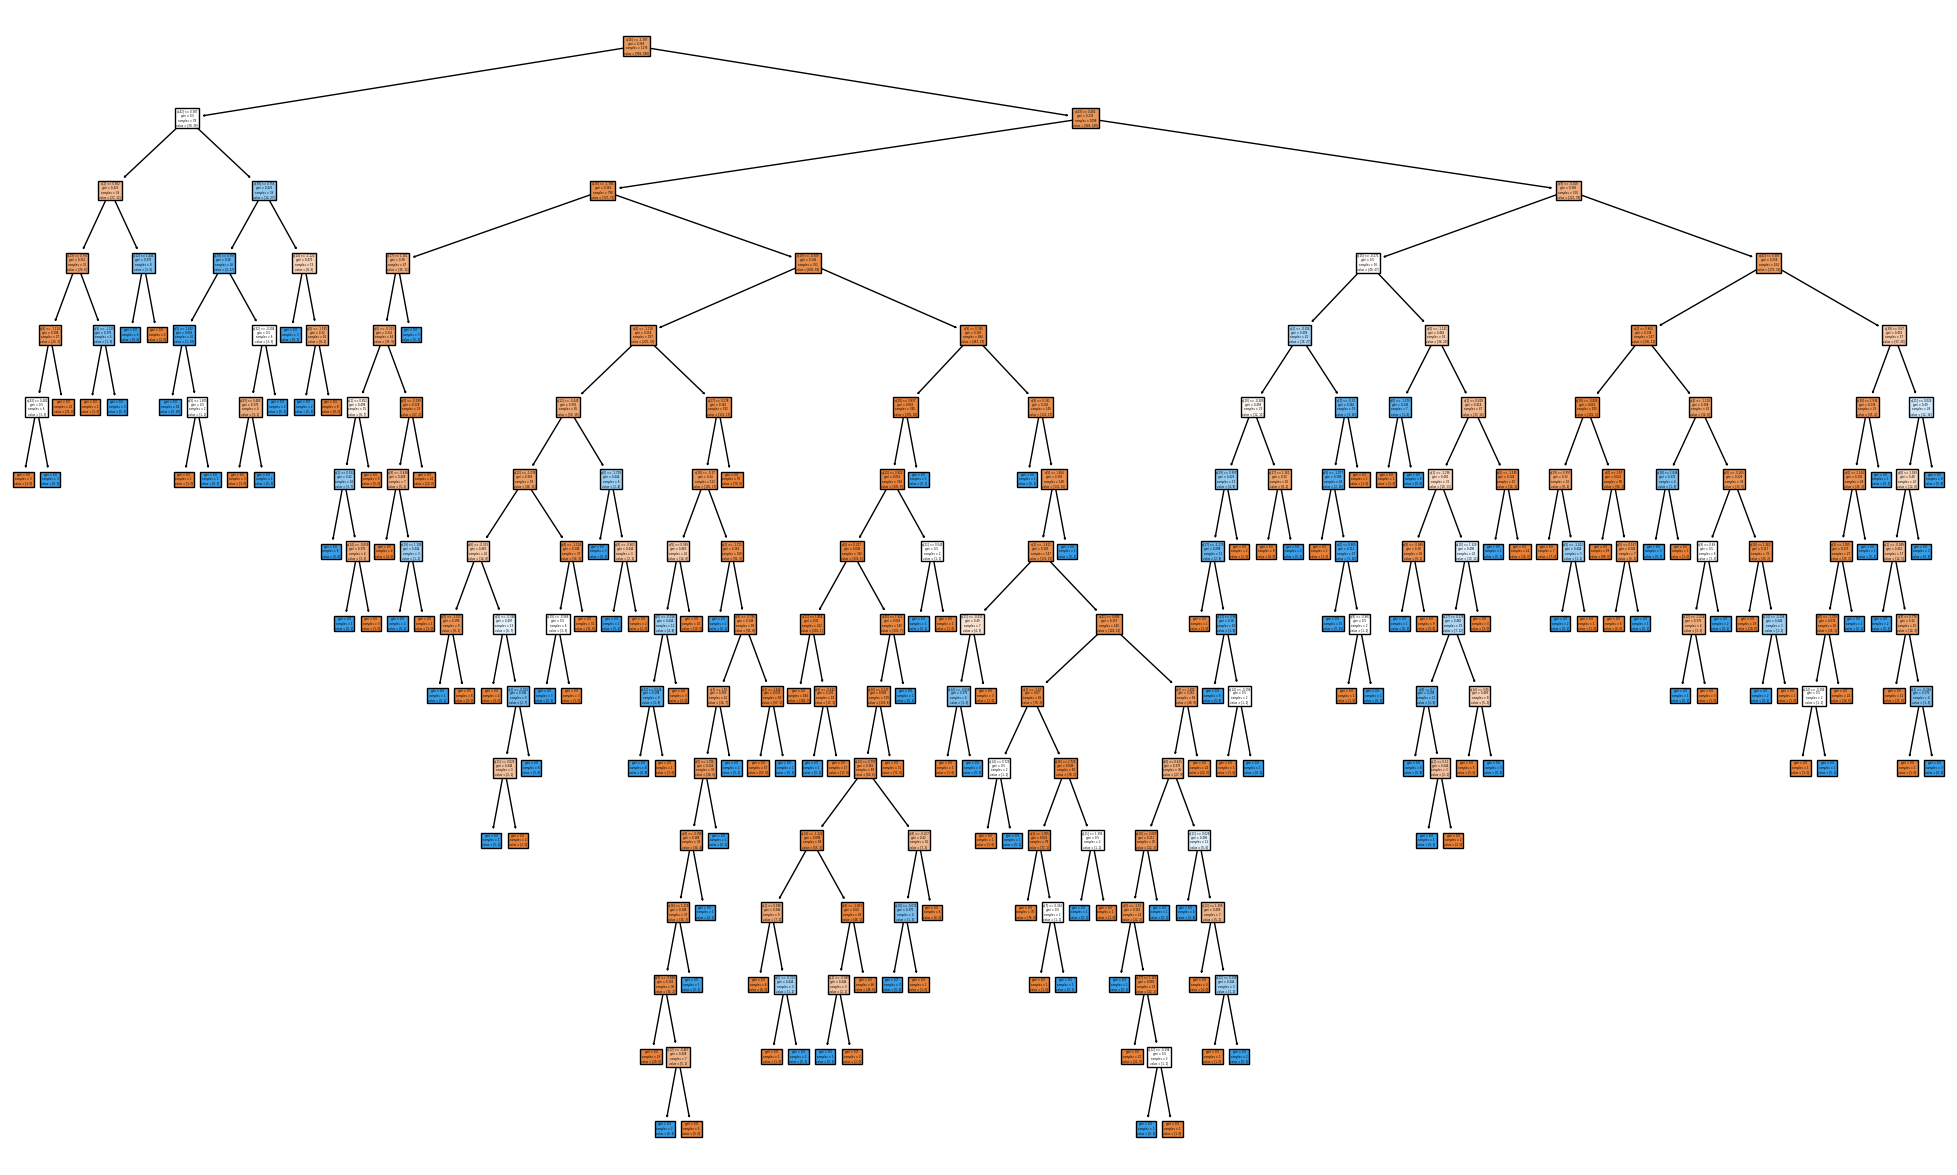

In [65]:
#Tree Visualization using basic Decision Tree
dtc.fit(x_train,y_train)
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

# --> Model Building - Random Forest

## Import the Model Builiding Libraries

In [66]:
from sklearn.ensemble import RandomForestClassifier

## Initializing the Model

In [67]:
rfc=RandomForestClassifier()

## Hyper parametering and Training of Model

In [68]:
from sklearn.model_selection import GridSearchCV
parameters=[{
    'max_depth': list(range(10, 15)),
    'max_features': list(range(0,14))
}]
gridrfc=GridSearchCV(rfc,param_grid=parameters,cv=5,scoring='accuracy')

## Training the Model

In [69]:
gridrfc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [70]:
gridrfc.best_params_

{'max_depth': 14, 'max_features': 13}

## Testing the Model

In [71]:
 y_pred2=gridrfc.predict(x_test)

In [72]:
pd.DataFrame({"Actual_values":y_test,"Predicted_values":y_pred2})

,Actual_values,Predicted_values
442,0,0
1091,0,0
981,1,0
785,0,0
1332,1,1
...,...,...
1439,0,0
481,0,0
124,1,0
198,0,0


## Evaluation of Model & Performance metrics

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


In [74]:
print("Accuracy of model :",accuracy_score(y_test,y_pred2))

Accuracy of model : 0.8469387755102041


In [75]:
confusion_matrix(y_test,y_pred2)

array([[241,   4],
       [ 41,   8]])

In [76]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.67      0.16      0.26        49

    accuracy                           0.85       294
   macro avg       0.76      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294



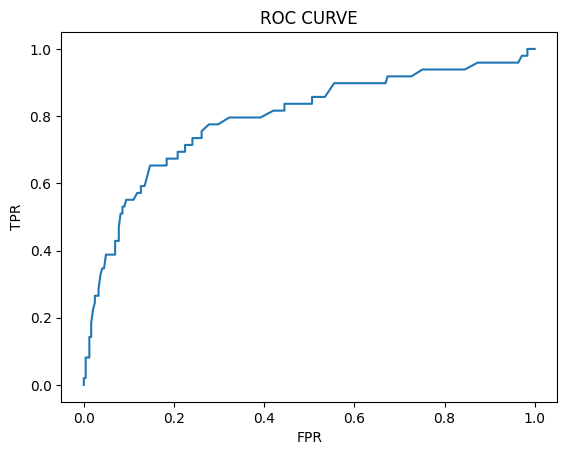

In [77]:
#ROC-AUC Curve
probability=gridrfc.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [78]:
threshsholds

array([1.75200000e+00, 7.52000000e-01, 7.50000000e-01, 6.60000000e-01,
       6.00000000e-01, 5.90000000e-01, 5.60000000e-01, 5.50000000e-01,
       5.00000000e-01, 4.90000000e-01, 4.60000000e-01, 4.50000000e-01,
       4.30000000e-01, 4.22222222e-01, 4.20000000e-01, 4.10000000e-01,
       4.00000000e-01, 3.80000000e-01, 3.70400000e-01, 3.70000000e-01,
       3.55833333e-01, 3.40454545e-01, 3.40000000e-01, 3.30000000e-01,
       3.26250000e-01, 3.15833333e-01, 3.10454545e-01, 3.10000000e-01,
       3.02000000e-01, 3.00000000e-01, 2.90454545e-01, 2.90000000e-01,
       2.80129305e-01, 2.80034965e-01, 2.63333333e-01, 2.40000000e-01,
       2.22333102e-01, 2.20000000e-01, 2.13333333e-01, 2.10000000e-01,
       2.03333333e-01, 2.00588235e-01, 2.00000000e-01, 1.92257187e-01,
       1.90034965e-01, 1.83368298e-01, 1.80034965e-01, 1.80000000e-01,
       1.73921569e-01, 1.60869565e-01, 1.60454545e-01, 1.60000000e-01,
       1.50034965e-01, 1.50000000e-01, 1.40731707e-01, 1.40034965e-01,
      